## Its all about the Matrix!

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://media.tenor.com/c-I5YMwtnLoAAAAS/matrix-neo.gif" width="200" height="100">
</div>

#### Objective of this task:

The Aim of this problem is to predict the top genres using the classification of the spotify music data. The data is provided from the kaggle dataset:https://www.kaggle.com/competitions/cs9856-spotify-classification-problem-2023/data.
<br>
The challenge is to build a good machine learning model that is able to predict the genres.

## Importing Libraries

First, we import the libraries required to read csv file, to visualise the data and to calculate the performance of our model.

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Getting the train and test csv file and Loading it into Pandas Dataframe and below table shows the dataframe which we read from the csv file

In [2]:
# Reading The CSV File and storing it in Pandas Dataframe
test1 = pd.read_csv('CS98XClassificationTest.csv')
train1 = pd.read_csv('CS98XClassificationTrain.csv')

In [3]:
train1

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


Identifying the datatype of our training data and finding the nulls in our dataset.

In [4]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
train1['top genre'].isnull().sum()

15

To drop the null values, we use .dropna() method from pandas

In [6]:
train1 = train1.dropna(axis=0)
train1

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


# Analysing the data

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExMjM3MjU2ZTRhNmIzMjVmN2EwNjA1YzU2MTNiNWM3NDk1Y2E0YTczNSZjdD1n/xT9C25UNTwfZuk85WP/giphy.gif" width="300" height="100">
</div>


#### Plotting the pie-chart for the top 15 genres
<br>
The frequency of each genre in the training data set is shown here, along with the percentage of songs that fall into each genre among all the songs in the training data set that are included in the pie-chart.

In [7]:
#Finding Frequency for the genres limited to 15
genres_categories = train1['top genre'].value_counts()[:15]
genres_categories

adult standards         68
album rock              66
dance pop               61
brill building pop      16
glam rock               16
europop                 14
dance rock              13
boy band                10
british invasion         8
bubblegum dance          7
disco                    7
art rock                 7
eurodance                6
barbadian pop            6
deep adult standards     6
Name: top genre, dtype: int64

In [8]:
#Calculating the percentage of genres
per_tg = genres_categories/len(train1)
per_tg

adult standards         0.155251
album rock              0.150685
dance pop               0.139269
brill building pop      0.036530
glam rock               0.036530
europop                 0.031963
dance rock              0.029680
boy band                0.022831
british invasion        0.018265
bubblegum dance         0.015982
disco                   0.015982
art rock                0.015982
eurodance               0.013699
barbadian pop           0.013699
deep adult standards    0.013699
Name: top genre, dtype: float64

In [9]:
#Taking keys and values per_tg
values = per_tg.values.tolist()
keys = per_tg.index.values.tolist()

#### Plotting top genre Piechart

Text(0.5, 1.0, 'Top 15 Popular Genres')

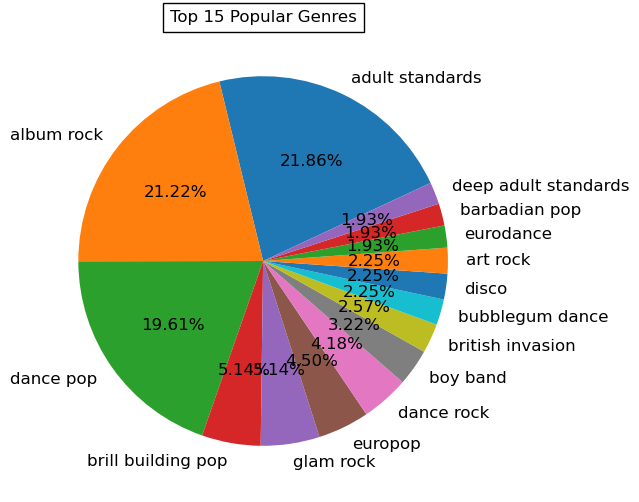

In [10]:
#Plotting piechart
figure,axis = plt.subplots(figsize=(6,6))
axis.pie(values,labels=keys,autopct='%.2f%%',textprops={'fontsize':12}, startangle=25)
plt.title("Top 15 Popular Genres", bbox={'facecolor':'1.0', 'pad':5, 'alpha':1})

#### Plotting the pie-chart for the top 15 artist
Same as above , we are finding the percentage of songs belonging to respective artists out of all the songs present in training data set.

In [11]:
#Finding Frequency for the artist limited to 15
artist_categories = train1['artist'].value_counts()[:15]
artist_categories

Elton John         9
Queen              7
ABBA               7
The Beatles        6
Rihanna            5
Mariah Carey       5
Whitney Houston    5
Taylor Swift       4
KISS               3
Bobby Vee          3
The Fleetwoods     3
Madonna            3
Bryan Adams        3
Roxette            3
Frank Sinatra      3
Name: artist, dtype: int64

In [12]:
#Calculating the percentage of artists
per_ar = artist_categories/len(train1)
per_ar

Elton John         0.020548
Queen              0.015982
ABBA               0.015982
The Beatles        0.013699
Rihanna            0.011416
Mariah Carey       0.011416
Whitney Houston    0.011416
Taylor Swift       0.009132
KISS               0.006849
Bobby Vee          0.006849
The Fleetwoods     0.006849
Madonna            0.006849
Bryan Adams        0.006849
Roxette            0.006849
Frank Sinatra      0.006849
Name: artist, dtype: float64

In [13]:
#Taking keys and values per_ar
values = per_ar.values.tolist()
keys = per_ar.index.values.tolist()

#### Plotting artist with most songs Piechart

Text(0.5, 1.0, 'Top 15 Artists with most songs')

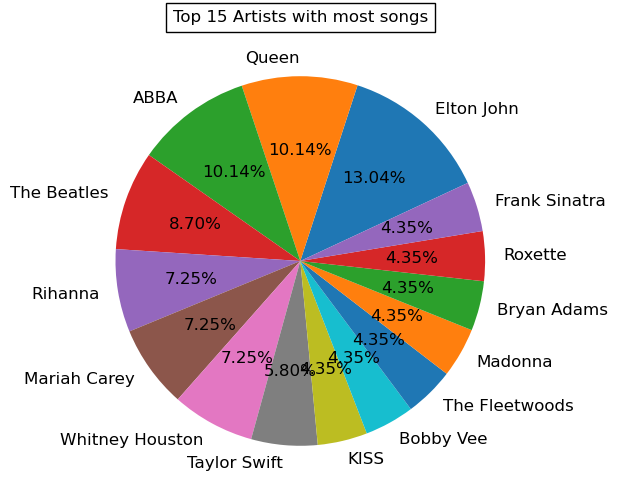

In [14]:
figure,axis = plt.subplots(figsize=(6,6))
axis.pie(values,labels=keys,autopct='%.2f%%',textprops={'fontsize':12}, startangle=25)
plt.title("Top 15 Artists with most songs", bbox={'facecolor':'1.0', 'pad':5, 'alpha':1})

In [15]:
train1.query('artist == "Elton John"')

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
11,12,Nikita,Elton John,1985,87,66,63,-9,7,75,343,12,3,68,glam rock
64,65,Your Song,Elton John,1990,128,33,55,-11,11,30,241,78,3,66,glam rock
99,100,Are You Ready For Love? - Remastered,Elton John,2017,117,75,80,-5,11,75,212,25,3,67,glam rock
119,120,Sorry Seems To Be The Hardest Word,Elton John,1976,118,22,37,-13,20,11,229,83,3,62,glam rock
206,207,Sacrifice,Elton John,1989,113,42,76,-13,4,49,304,2,3,72,glam rock
239,240,Bennie And The Jets - Remastered 2014,Elton John,1973,133,67,67,-8,50,78,323,26,5,65,glam rock
255,256,Don't Go Breaking My Heart,Elton John,1975,131,84,73,-9,6,78,275,15,3,75,glam rock
374,375,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,1972,137,53,60,-9,9,34,282,43,3,81,glam rock


In [16]:
train1.query('artist == "Queen"')

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
20,21,Love Of My Life - Remastered 2011,Queen,1975,154,18,33,-12,12,26,217,93,3,74,glam rock
147,148,Radio Ga Ga - 2011 Mix,Queen,1984,112,50,74,-8,19,66,348,18,4,76,glam rock
162,163,Another One Bites The Dust - Remastered 2011,Queen,1980,110,53,93,-6,16,75,215,11,16,82,glam rock
182,183,We Will Rock You - Remastered,Queen,1977,81,50,69,-7,26,48,122,68,12,79,glam rock
253,254,Fat Bottomed Girls - 2011 Remaster,Queen,1978,89,68,33,-8,34,42,256,3,5,67,glam rock
257,258,Killer Queen - 2011 Mix,Queen,1974,117,65,54,-6,13,61,180,39,5,51,glam rock
294,295,Bohemian Rhapsody - 2011 Mix,Queen,1975,71,40,41,-10,30,22,354,27,5,84,glam rock


In [17]:
train1.query('artist == "Taylor Swift"')

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
200,201,We Are Never Ever Getting Back Together,Taylor Swift,2012,86,68,63,-6,12,75,193,1,9,73,dance pop
421,422,Love Story,Taylor Swift,2008,119,74,62,-4,8,31,236,13,3,73,dance pop
422,423,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,2006,100,42,62,-7,12,29,203,29,2,61,dance pop
436,437,I Knew You Were Trouble.,Taylor Swift,2012,77,47,62,-7,3,68,220,0,4,75,dance pop


### Conclusion from our Visualisation and Reports
Based on this we can associate a genre with an artist.
<br>
We think it would be useful to incorporate our artist column in our input features after analysing artists' musical genres.
<br>
On the basis of that, we'll use one hot encoding on artists.

Plotting Linear Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

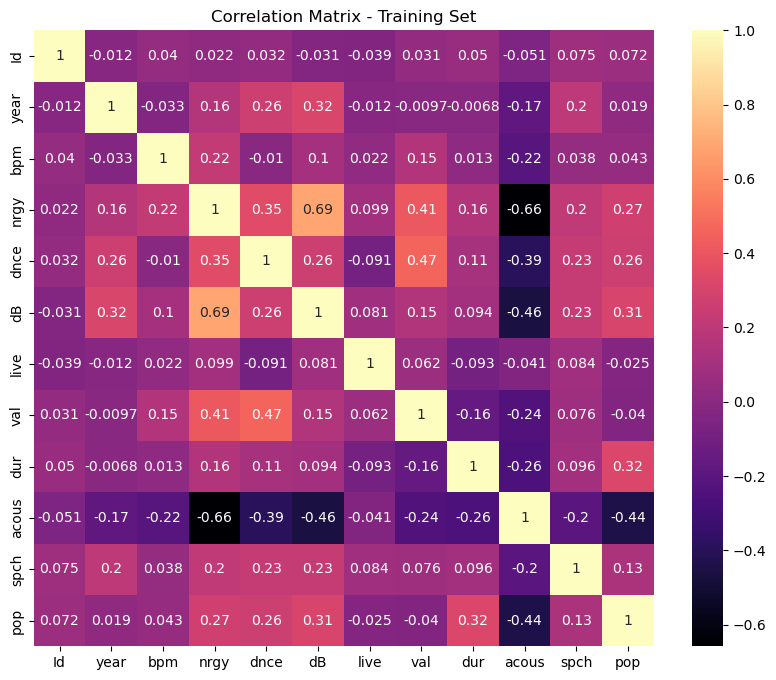

In [18]:
import seaborn as sb

figure,axis = plt.subplots(figsize=(10,8))
sb.heatmap(train1.corr(), annot=True, cmap='magma')
plt.title('Correlation Matrix - Training Set')
plt.show

#### What factors determine the genre of a song?
<br>
Based on the visualisation and reports above, we concluded that artists usually create songs of a specific genre. 
Also, we have removed ID and title from the training set since it doesnt contribute to genre, but have included other features like tempo(bpm), words in song(spch), acousticness and other music variables that describe the genre of the songs. 

# Implementing One hot encoding for the artist column

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://media.tenor.com/KBe_nw4IL2QAAAAC/matrix-code.gif" width="300" height="100">
</div>

Here we are implementing one hot encoding in "artist" column.
<br>
But the problem here is there are a lot more categories of artists in training set than test set while we are using pandas get_dummies method for one hot encoding.
<br>
To solve that problem, we first tried to get the mutual inclusive artist from the training and test set and then apply one hot encoding to both the training and test sets. The reason we took common categories is to maintain consistency while implementing one hot encoding.
<br>
After that, a left join is applied on the training data and the test data.
<br>
Then, we will align columns in the training and test dataframes in order to make both the dataframes identical.

In [19]:
# Find the unique categories in the training and test data
train_categories = set(train1['artist'].unique())
test_categories = set(test1['artist'].unique())

# Find the common categories between the training and test data
common_categories = list(train_categories.intersection(test_categories))
common_categories

['Flo Rida',
 'TOTO',
 'Richard Marx',
 'Whitesnake',
 'The Hilltoppers',
 'Queen',
 'Linkin Park',
 'The Black Eyed Peas',
 'Van Morrison',
 '50 Cent',
 'Them',
 'Katy Perry',
 'The Notorious B.I.G.',
 'ABBA',
 'Doris Day',
 'Elton John',
 'Akon',
 'Tina Turner',
 'The Five Satins',
 'Ne-Yo',
 'Alphaville',
 'Bon Jovi',
 'The Byrds',
 'Madonna',
 'Connie Francis',
 'Diana Ross',
 'Whitney Houston',
 'Kim Wilde',
 'Rihanna',
 'Paul Anka',
 'Barbra Streisand',
 'Bryan Adams',
 'Dean Martin',
 'CÃ©line Dion',
 'Eric Prydz',
 'The Beatles',
 'Craig Douglas']

In [20]:
# Replace the categorical feature in the training data with a numerical representation
# where each category is assigned a unique integer value
train1['artist'] = train1['artist'].replace(common_categories, range(len(common_categories)))

# Replace the categorical feature in the test data with a numerical representation
# where each category is assigned a unique integer value
test1['artist'] = test1['artist'].replace(common_categories, range(len(common_categories)))

# Perform one-hot encoding on the numerical representation of the categorical feature
train1 = pd.get_dummies(train1, columns=['artist'])
test1 = pd.get_dummies(test1, columns=['artist'])

# Ensure that the one-hot encoded data has the same number of columns in both the training and test data
train1, test1 = train1.align(test1, join='left', axis=1, fill_value=0)

C:\Users\patel\AppData\Local\Temp\ipykernel_7508\2498272887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['artist'] = train1['artist'].replace(common_categories, range(len(common_categories)))


# Organizing training and test set

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://media.tenor.com/fK9_-Mxat30AAAAC/organize.gif" width="300" height="100">
</div>

In order to predict the target value("top genres") using the model that we have trained using training data set, the same features should be present in the test dataset as the training dataset.

In [21]:
y_train = train1["top genre"]

While doing one hot encoding, the test data also got top genres column from training set so we tried to drop that along with Id and title.

In [22]:
#Dropping columns in training data
train1=train1.drop("Id",axis=1)
train1=train1.drop("top genre",axis=1)
train1=train1.drop("title",axis=1)

#Dropping columns in test data
test1=test1.drop("Id",axis=1)
test1=test1.drop("title",axis=1)
test1=test1.drop("top genre",axis=1)

In [23]:
x_train = train1 #new_train1

In [24]:
x_train

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,artist_Van Halen,artist_Vengaboys,artist_Wamdue Project,artist_Wayne Fontana & The Mindbenders,artist_Wham!,artist_White Lion,artist_Yazoo,artist_Youngbloodz,artist_Yusuf / Cat Stevens,artist_ZZ Top
0,1996,107,31,45,-8,13,28,150,75,3,...,0,0,0,0,0,0,0,0,0,0
2,1979,105,36,63,-9,13,67,245,11,3,...,0,0,0,0,0,0,0,0,0,0
3,1980,170,28,47,-16,13,33,232,25,3,...,0,0,0,0,0,0,0,0,0,0
4,1973,121,47,56,-8,15,40,193,45,3,...,0,0,0,0,0,0,0,0,0,0
5,2010,110,56,71,-7,12,23,223,15,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1959,80,22,18,-17,10,16,214,92,4,...,0,0,0,0,0,0,0,0,0,0
449,2010,148,81,53,-13,23,96,147,50,3,...,0,0,0,0,0,0,0,0,0,0
450,2002,168,55,73,-8,20,61,289,23,14,...,0,0,0,0,0,0,0,0,0,0
451,2000,165,87,64,-5,6,88,191,5,8,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x_test = test1
x_test

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,artist_Van Halen,artist_Vengaboys,artist_Wamdue Project,artist_Wayne Fontana & The Mindbenders,artist_Wham!,artist_White Lion,artist_Yazoo,artist_Youngbloodz,artist_Yusuf / Cat Stevens,artist_ZZ Top
0,2005,154,93,65,-3,75,74,213,1,18,...,0,0,0,0,0,0,0,0,0,0
1,1994,161,39,30,-15,11,14,292,26,3,...,0,0,0,0,0,0,0,0,0,0
2,1977,64,46,27,-7,12,18,179,38,3,...,0,0,0,0,0,0,0,0,0,0
3,2010,127,92,71,-9,37,53,216,6,4,...,0,0,0,0,0,0,0,0,0,0
4,2018,115,46,56,-12,21,34,153,18,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2005,125,57,61,-8,38,76,209,3,47,...,0,0,0,0,0,0,0,0,0,0
109,2010,130,89,67,-6,10,80,215,4,3,...,0,0,0,0,0,0,0,0,0,0
110,1994,84,58,78,-7,14,76,253,43,27,...,0,0,0,0,0,0,0,0,0,0
111,1978,127,97,72,-5,12,73,287,6,14,...,0,0,0,0,0,0,0,0,0,0


# Training the Models

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://i.makeagif.com/media/7-05-2016/wf2hbR.gif" width="300" height="100">
</div>

To evaluate the model in our validation set, we divided the data as 80 percent in training data and 20 percent in validation.  
<br>
Here the random state = 42 is used, so that the same data gets repeated in training and validation set.
<br>
And using different values will results in different instances in training and validation set.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

To solve the classification problem, we have implemented several models including logistic regression, support vector machines, decision trees, random forests, and Extra Trees.
<br>
While evaluating, we know certain limitation of each models like logistic regression faces issues on non linear problems. SVM has issues on handling noisy data and being sensitive to imbalanced datasets. Decision tree issues related to bias and overfitting. Random forest and Extra Trees faces issue on sensitivity to noisy data
<br>
We tried separate models as it wasn't improving our score. So finally, We tried different approach using Voting Classifer since the different models were creating different errors and combining them, we expected better accuracy score. As a result, it improved our results. 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

log_clf = make_pipeline(StandardScaler(), LogisticRegression())
rnd_clf = RandomForestClassifier()
svc_clf = make_pipeline(StandardScaler(), SVC())
et_clf = ExtraTreesClassifier()
voting_clf = VotingClassifier(estimators=[('svc', svc_clf),('lr', log_clf), ('rf', rnd_clf), ('et', et_clf)],voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC())])),
                             ('lr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('rf', RandomForestClassifier()),
                             ('et', ExtraTreesClassifier())])

In [28]:
y_pred_val = voting_clf.predict(X_val)

# Evaluating the model

<div style = "float: left; margin-right: 10px; padding-top: 5px">
    <img src="https://media.tenor.com/n4D40UqRwccAAAAC/morpheus-matrix.gif" width="300" height="100">
</div>


We have used accuracy as our metric for evaluating the performance of our classification models.Out of the total number of samples, it calculates the percentage of correctly identified samples.
<br>
Other than accuracy, we have also used confusion matrix for evaluating the performance of our classification. Since it lists the total number of the model's accurate and inaccurate predictions, split down by each class.

In [29]:
accuracy = accuracy_score(Y_val, y_pred_val)
print("Accuracy: ", accuracy)

Accuracy:  0.5340909090909091


In [30]:
cm=confusion_matrix(Y_val,y_pred_val)
print("Confusion Matrix:\n ", cm)

Confusion Matrix:
  [[12  3  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]


# Training the model in whole training set and Submitting our predicted results to kaggle

In [31]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC())])),
                             ('lr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('rf', RandomForestClassifier()),
                             ('et', ExtraTreesClassifier())])

In [32]:
y_pred_test = voting_clf.predict(x_test)

In [33]:
test_data_read = pd.read_csv('CS98XClassificationTest.csv')

In [34]:
output_pred = pd.DataFrame({"id":test_data_read.Id,"top genre":y_pred_test})
output_pred.to_csv("submissionvoting2.csv",index=False)

In [36]:
y_train

0         adult standards
2         adult standards
3         adult standards
4               glam rock
5                     pop
              ...        
448       adult standards
449    brill building pop
450             dance pop
451              boy band
452            album rock
Name: top genre, Length: 438, dtype: object

# Performance on the Test set in Kaggle Competition

It turns out based on our evaluation on validation set, it acted the same as in the test dataset in kaggle competition. Our score reaches upto 54% approx in the competition(https://www.kaggle.com/competitions/cs9856-spotify-classification-problem-2023/leaderboard). 